In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib import style
style.use("ggplot")

In [15]:
# Combining all the months data
csv_files_list = list(map(lambda file: f"Sales_Data/{file}",os.listdir("Sales_Data")))
data_list = list(pd.read_csv(file) for file in csv_files_list)
sales = pd.concat(data_list, ignore_index=True)

In [16]:
# What was the best month for sales and how much was earned that Month?
sales = sales.loc[sales['Order ID'] != "Order ID"]
sales.set_index(pd.to_datetime(sales['Order Date'],format="mixed",dayfirst=False),drop=True,inplace=True)
sales.drop("Order Date",axis=1,inplace=True)
best_month = sales['Quantity Ordered'].astype(float) * sales['Price Each'].astype(float)
a = best_month.resample("BM").sum().sort_values(ascending=False)


Order Date
2019-12-31    4720380.02
2019-10-31    3736726.88
2019-04-30    3577109.98
2019-05-31    3152606.75
2019-11-29    3092666.52
2019-07-31    2825285.58
2019-03-29    2620660.64
2019-06-28    2400292.44
2019-02-28    2202022.42
2019-08-30    2178894.06
2019-09-30    2163133.95
2019-01-31    1813586.44
2020-01-31       8670.29
dtype: float64

Text(0, 1, 'Money')

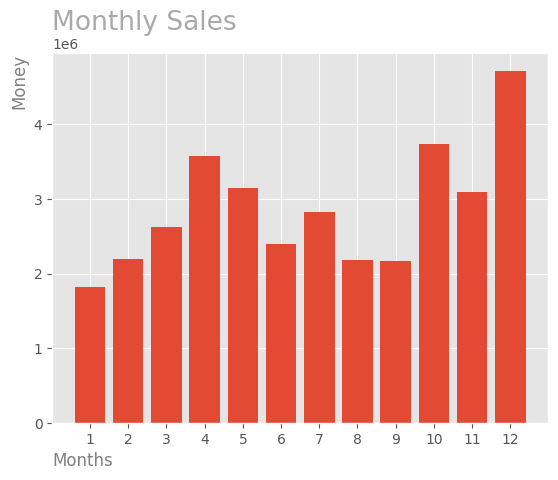

In [49]:
months = best_month.resample("BM").sum().sort_values(ascending=False).head(12).index.month # Ou range(1,13) kkkkkk
sales_values = pd.DataFrame(best_month.resample("BM").sum().sort_values(ascending=False).head(12))

plt.bar(months,sales_values[0])
plt.xticks(months)
plt.title("Monthly Sales",loc='left',color='darkgray',fontsize=19)
plt.xlabel("Months",loc="left",color='gray')
plt.ylabel("Money",loc='top',color='gray')

KeyError: '0'